# Fitting Models Exercise 2

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Fitting a decaying oscillation

For this problem you are given a raw dataset in the file `decay_osc.npz`. This file contains three arrays:

* `tdata`: an array of time values
* `ydata`: an array of y values
* `dy`: the absolute uncertainties (standard deviations) in y

Your job is to fit the following model to this data:

$$ y(t) = A e^{-\lambda t} \cos{\omega t + \delta} $$

First, import the data using NumPy and make an appropriately styled error bar plot of the raw data.

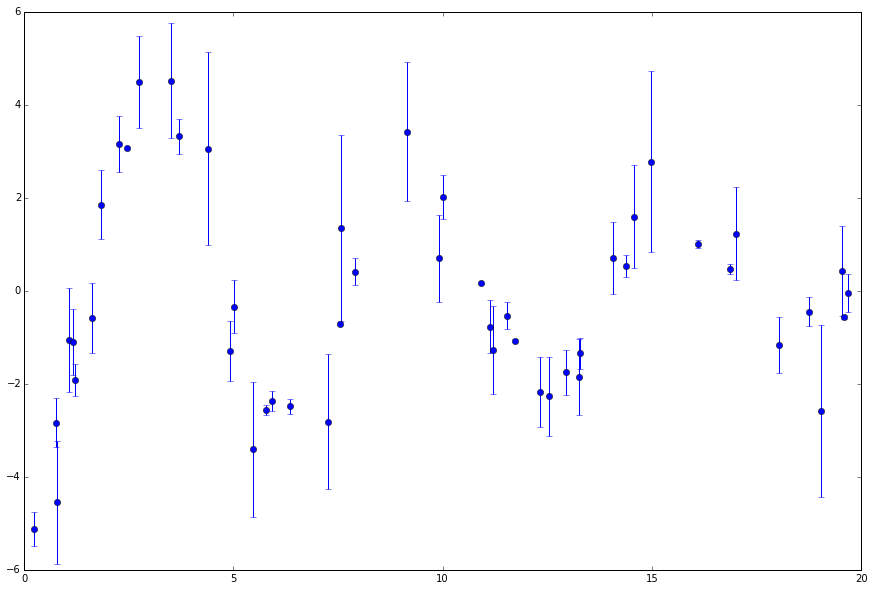

In [9]:
data=np.load("decay_osc.npz")
T=data["tdata"]
Y=data["ydata"]
dy=data["dy"]
f=plt.figure(figsize=(15,10))
plt.errorbar(T,Y,yerr=dy,fmt='o');

In [10]:
assert True # leave this to grade the data import and raw data plot

Now, using `curve_fit` to fit this model and determine the estimates and uncertainties for the parameters:

* Print the parameters estimates and uncertainties.
* Plot the raw and best fit model.
* You will likely have to pass an initial guess to `curve_fit` to get a good fit.
* Treat the uncertainties in $y$ as *absolute errors* by passing `absolute_sigma=True`. 

[(4.8927946792834032, 0.0082012923005792583), (0.095213976328140465, 7.4821004369225783e-06), (0.99748114442599423, 5.3602426959992197e-06), (9.4505468859563635, 0.00053903670017617844)]


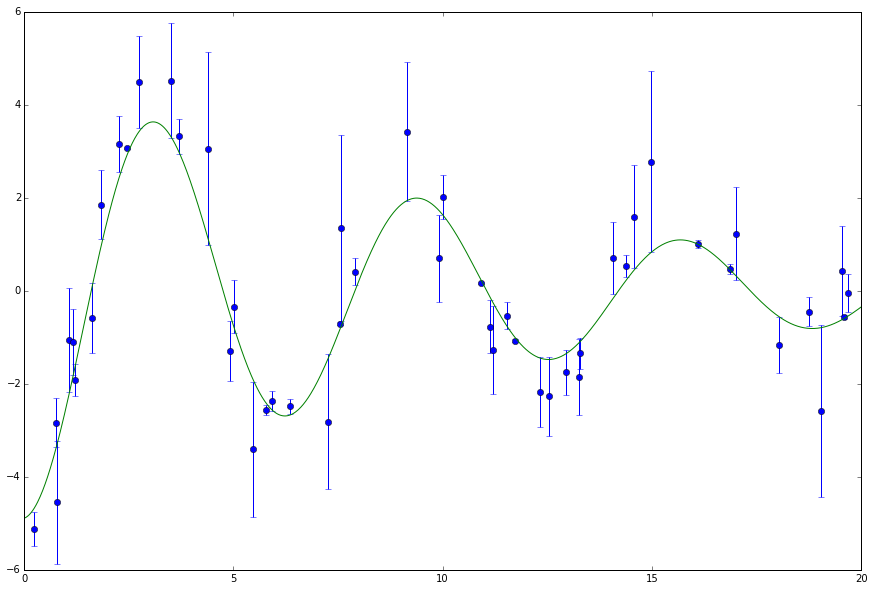

In [14]:
par_est=[0,0,0,0]
popt, popc = opt.curve_fit(lambda t,A,lam,ome,delt:A*np.exp(-lam*t)*np.cos(ome*t+delt), T, Y, par_est, sigma=dy, absolute_sigma=True)
print(list(zip(popt, np.diag(popc))))
f=plt.figure(figsize=(15,10))
plt.errorbar(T,Y,yerr=dy,fmt='o')
Tx=np.linspace(0,20, 1000)
plt.plot(Tx,popt[0]*np.exp(-popt[1]*Tx)*np.cos(-popt[2]*Tx+popt[3]));

In [ ]:
assert True # leave this cell for grading the fit; should include a plot and printout of the parameters+errors